# **Universidad ICESI**

*Milton Orlando Sarria Paja*

---

## Introducción a la Clasificación Multiclase  🧠

📌 La clasificación multiclase, en ciertos aspectos, es un problema sencillo. Sin embargo, presenta desafíos interesantes que sirven como base para temas más avanzados en el aprendizaje automático, como la predicción estructurada. Hasta ahora, hemos abordado la clasificación binaria, donde los modelos lineales realizan predicciones simples basadas en la evaluación del signo de $\theta^T x$, donde $\theta$ representa el modelo aprendido.  

En la clasificación multiclase, el objetivo es construir un modelo capaz de asignar una única etiqueta de clase $y$ a cada ejemplo $x$. Dado un conjunto de datos $D = \{(x_i, y_i)\}_{i=1}^{m}$, donde $x_i \in \mathbb{R}^n$ y $y_i \in \{0, 1, ..., k\}$, el modelo debe aprender a predecir la clase correcta a partir de la entrada. Este tipo de problemas requiere enfoques más expresivos que los utilizados en la clasificación binaria y es fundamental en diversas aplicaciones del aprendizaje automático, como el reconocimiento de imágenes, el procesamiento del lenguaje natural y la detección de objetos.

### Usando un clasificador binario como una caja negra, ¿podemos reducir la tarea de clasificación multiclase al caso binario? ###

## One-versus-all 🚀

Supongamos que nuestro algoritmo de caja negra es un clasificador lineal y que cada clase puede separarse de todas las demás etiquetas. Si hacemos esto, básicamente estamos descomponiendo la tarea en el aprendizaje de \( n \) clasificadores binarios independientes, y sabemos cómo hacerlo.


<img src="img_multiclass/img1.png" width="150" align="left" > 


<img src="img_multiclass/img2.png" width="500">


🤔La única advertencia es que, cuando algunos puntos con una determinada etiqueta no son linealmente separables del resto, como se muestra en la figura a continuación, este esquema no puede utilizarse. Básicamente, nos preocupa la expresividad de este paradigma. No siempre es posible aprender, ya que no siempre es separable de la manera que queremos. Aunque funciona bien y es el método más comúnmente utilizado, no existe una justificación teórica para ello.

<img src="img_multiclass/img3.png" width="300">

los puntos rojos no son linealmente separables de las otras clases

---- 

## Veamos un ejemplo 📉⚙️


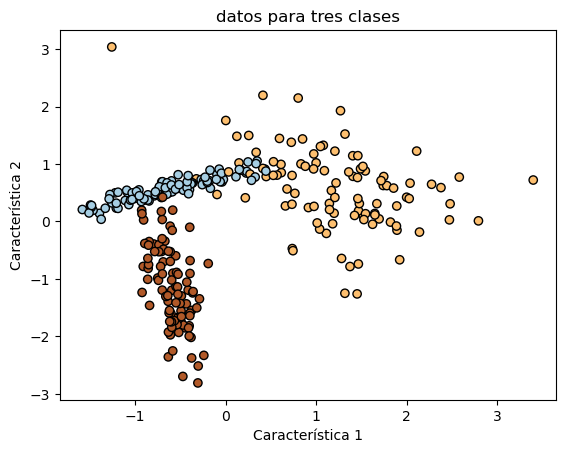

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Generar un conjunto de datos artificial con 3 clases
X, y = make_classification(n_samples=300, n_features=2, n_classes=3, n_informative=2, 
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

# Escalar los datos para mejorar la convergencia del modelo
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Función para visualizar regiones de decisión
def plot_data(X, y, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
    plt.title(title)
    plt.xlabel("Característica 1")
    plt.ylabel("Característica 2")

plot_data(X, y, "datos para tres clases")

In [59]:
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [60]:
X_train[:10]

array([[ 1.49156602,  0.91699459],
       [-0.50961409, -1.41221983],
       [ 0.61618602,  0.85014437],
       [-0.92261208,  0.13395239],
       [-0.05862484,  0.69205552],
       [ 0.66163805,  0.27095724],
       [ 1.46740169, -0.7391796 ],
       [ 0.21877724,  0.41175054],
       [ 1.11416059, -0.20733353],
       [-0.04501716,  0.83910885]])

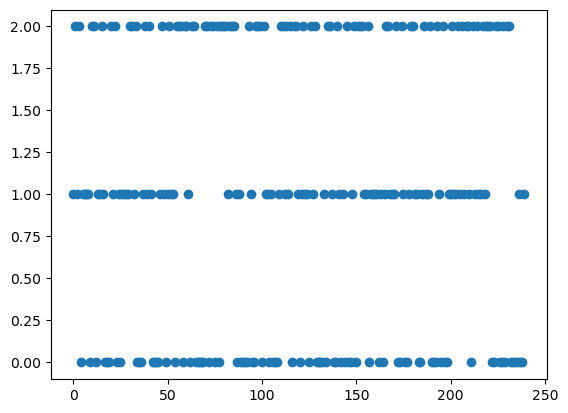

In [61]:
plt.plot(y_train,'o')

## Creemos un clasificador para separar la Clase 0 de las demás.

In [62]:
y_train

array([1, 2, 1, 2, 0, 1, 1, 1, 1, 0, 2, 2, 0, 1, 1, 2, 1, 0, 0, 0, 2, 1,
       2, 0, 1, 0, 1, 1, 1, 1, 2, 2, 1, 2, 0, 0, 0, 1, 2, 1, 2, 1, 0, 0,
       0, 0, 1, 2, 1, 0, 1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 2, 1, 0, 2, 2, 0,
       0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 1, 0,
       1, 0, 0, 0, 0, 2, 1, 0, 0, 2, 2, 2, 0, 2, 1, 1, 0, 1, 0, 0, 0, 1,
       2, 2, 1, 2, 1, 2, 0, 2, 2, 1, 0, 1, 2, 1, 1, 0, 2, 1, 2, 0, 0, 0,
       0, 1, 0, 2, 2, 1, 0, 0, 2, 1, 0, 1, 0, 2, 0, 0, 1, 2, 0, 2, 2, 2,
       1, 1, 2, 0, 1, 1, 1, 1, 0, 1, 0, 1, 2, 2, 1, 1, 1, 2, 0, 0, 2, 1,
       0, 0, 1, 2, 2, 1, 1, 0, 0, 1, 2, 1, 1, 2, 0, 0, 0, 2, 1, 0, 2, 0,
       0, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 0, 2, 1, 2, 1, 1, 2, 1, 2,
       2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 1, 0, 0, 1])

In [64]:
########################
y_train_0=y_train==0
y_train_0

array([False, False, False, False,  True, False, False, False, False,
        True, False, False,  True, False, False, False, False,  True,
        True,  True, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False,  True,  True,
        True, False, False, False, False, False,  True,  True,  True,
        True, False, False, False,  True, False, False, False, False,
        True, False, False, False,  True, False, False, False,  True,
       False, False,  True,  True,  True,  True,  True, False, False,
        True, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
        True,  True,  True, False, False,  True,  True, False, False,
       False,  True, False, False, False,  True, False,  True,  True,
        True, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False,  True,
       False, False,

In [63]:
# Función para visualizar regiones de decisión
def plot_decision_boundary(model, X, y, title):
    h = 0.02  # Paso de la malla
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
    plt.title(title)
    plt.xlabel("Característica 1")
    plt.ylabel("Característica 2")

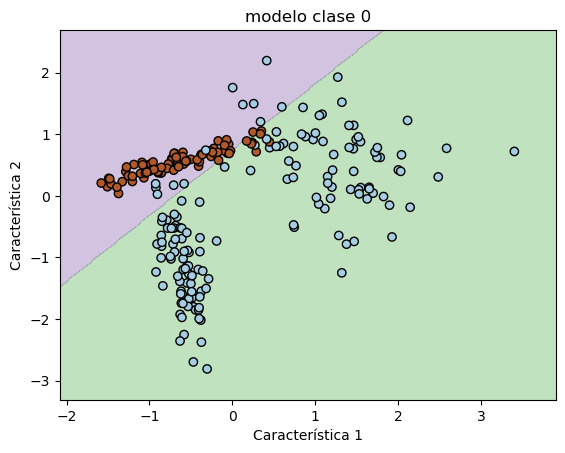

In [65]:
#create the classifier
clf0 = LogisticRegression(solver='lbfgs')
#Train the classifier
clf0.fit(X_train,y_train_0)
plot_decision_boundary(clf0,X_train, y_train_0, "modelo clase 0")

## Creemos un clasificador para separar la Clase 1 de las demás.

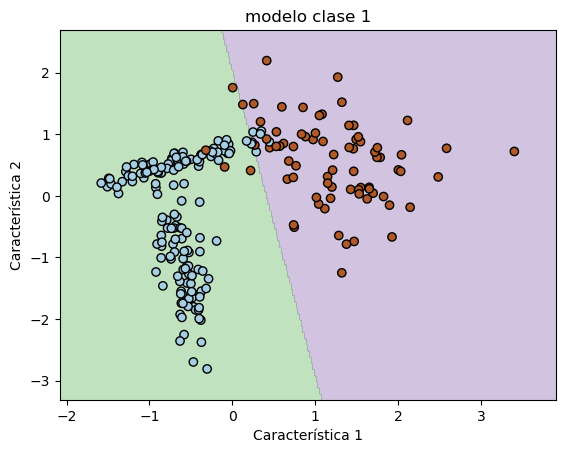

In [68]:
########################
########################
y_train_1=y_train==1
#create the classifier
clf1 = LogisticRegression(solver='lbfgs')
#Train the classifier
clf1.fit(X_train,y_train_1)
plot_decision_boundary(clf1,X_train, y_train_1, "modelo clase 1")

## Creemos un clasificador para separar la Clase 2 de las demás.

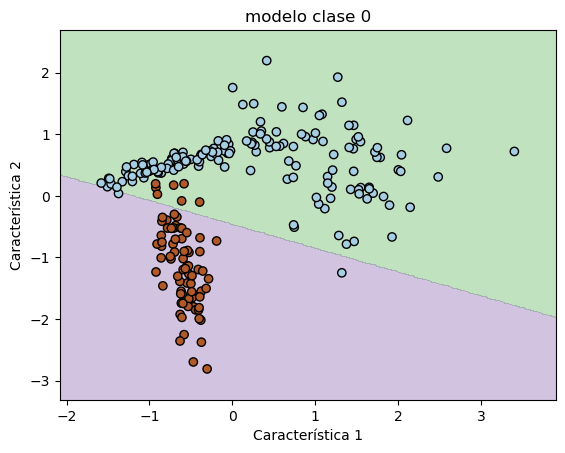

In [69]:
########################
y_train_2=y_train==2
y_train_2
#create the classifier
clf2 = LogisticRegression(solver='lbfgs')
#Train the classifier
clf2.fit(X_train,y_train_2)
plot_decision_boundary(clf2,X_train, y_train_2, "modelo clase 0")

In [12]:
CLF = [clf0,clf1,clf2]

### Let's try the classifiers with the data

In [70]:
#validar 3 clasificadores
probs=np.zeros((y_test.size,3))

for i in np.unique(y_test):
    p_i=CLF[i].predict_proba(X_test)
    probs[:,i]=p_i[:,1]
    

In [71]:
probs[:10]

array([[3.99567831e-01, 9.06097250e-01, 3.62775872e-04],
       [9.78348490e-04, 9.97164757e-01, 4.20290272e-03],
       [2.36962637e-02, 9.86535922e-01, 9.95324534e-04],
       [3.30216557e-05, 9.99889452e-01, 3.00128379e-03],
       [7.49727704e-01, 6.56340729e-02, 2.42244181e-02],
       [4.40861248e-03, 5.20530584e-03, 9.97534363e-01],
       [9.52698177e-01, 8.72405948e-04, 3.75990848e-01],
       [8.96590996e-05, 9.99628685e-01, 4.46204847e-03],
       [8.17888864e-01, 9.58822928e-01, 1.83941291e-05],
       [9.99957456e-01, 1.74262526e-02, 1.30443059e-05]])

y_pred

In [73]:
y_pred

array([1, 1, 1, 1, 0, 2, 0, 1, 1, 0, 2, 1, 1, 1, 0, 2, 0, 0, 2, 2, 0, 1,
       0, 1, 2, 1, 0, 2, 1, 1, 1, 0, 0, 0, 0, 2, 1, 2, 0, 0, 2, 2, 1, 2,
       2, 2, 0, 1, 0, 0, 2, 1, 0, 0, 1, 1, 0, 0, 2, 1], dtype=int64)

In [75]:
y_test

array([1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 0, 2, 0, 0, 2, 2, 0, 1,
       0, 1, 2, 1, 0, 2, 1, 1, 1, 0, 0, 2, 0, 2, 1, 2, 0, 0, 2, 2, 1, 2,
       2, 2, 2, 0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 0, 2, 0])

In [74]:
y_pred=np.argmax(probs,1)
acc = np.sum(y_test==y_pred)/y_test.size*100
print(acc)

88.33333333333333


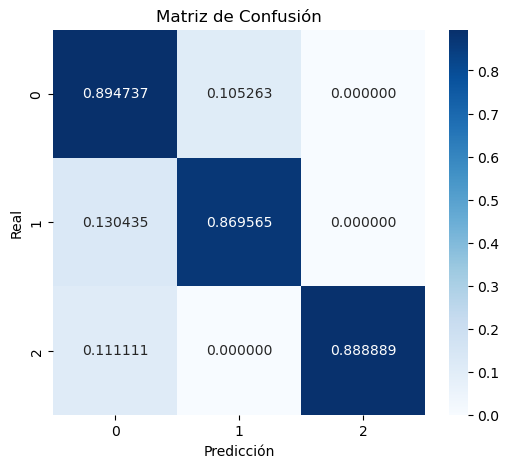

In [78]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred,normalize='true')

# Mostrar la matriz de confusión como un mapa de calor
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="f", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()



# Usando scikit-learn

En *scikit-learn*, la clasificación multiclase se puede abordar utilizando el modelo **OneVsRestClassifier**, que entrena un clasificador binario independiente para cada clase, separándola de las demás. Además, la clase **LogisticRegression** implementa la regresión logística multinomial con la función *softmax*, permitiendo manejar directamente problemas de clasificación multiclase sin necesidad de descomponerlos en múltiples problemas binarios. Esto facilita la implementación de modelos eficientes y bien optimizados para tareas de clasificación con múltiples categorías.

Doing all the previous process again

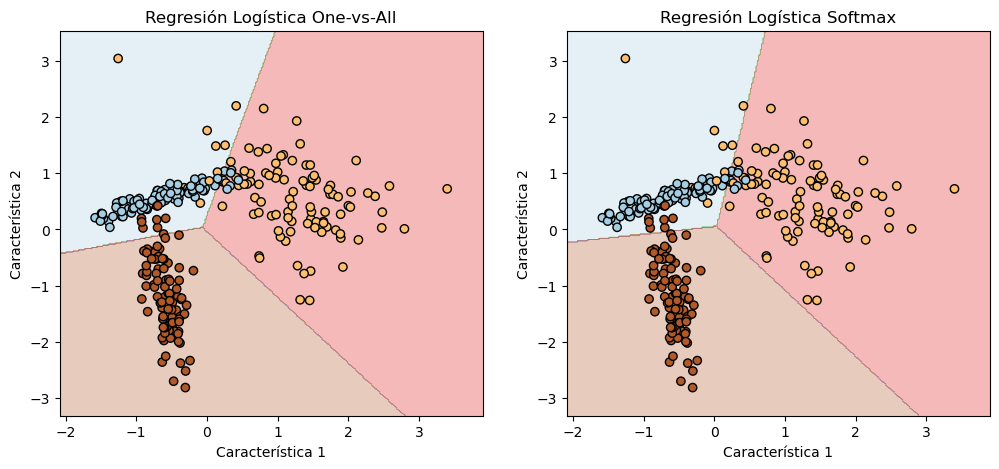

In [79]:
# Entrenar modelos One-vs-All y Softmax
ova_model     = OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=200)).fit(X_train, y_train)
softmax_model = LogisticRegression( solver='lbfgs', max_iter=200).fit(X_train, y_train)

# Graficar las regiones de decisión para ambos modelos
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_decision_boundary(ova_model, X, y, "Regresión Logística One-vs-All")

plt.subplot(1, 2, 2)
plot_decision_boundary(softmax_model, X, y, "Regresión Logística Softmax")

plt.show()

In [80]:
from sklearn.metrics import accuracy_score
y_pred=ova_model.predict(X_test)
accuracy_score(y_test, y_pred)*100


88.33333333333333

In [19]:
probs_ova=ova_model.predict_proba(X_test)
probs_ova[:10]

array([[3.05941277e-01, 6.93780952e-01, 2.77770394e-04],
       [9.76058648e-04, 9.94830876e-01, 4.19306575e-03],
       [2.34331676e-02, 9.75582559e-01, 9.84273592e-04],
       [3.29253899e-05, 9.96974540e-01, 2.99253434e-03],
       [8.92972882e-01, 7.81743117e-02, 2.88528066e-02],
       [4.37732215e-03, 5.16836094e-03, 9.90454317e-01],
       [7.16550702e-01, 6.56160692e-04, 2.82793137e-01],
       [8.92858496e-05, 9.95467241e-01, 4.44347301e-03],
       [4.60333747e-01, 5.39655900e-01, 1.03527982e-05],
       [9.82858903e-01, 1.71282762e-02, 1.28212576e-05]])

In [82]:
from sklearn.metrics import accuracy_score
y_pred=softmax_model.predict(X_test)
accuracy_score(y_test, y_pred)*100


88.33333333333333

In [21]:
probs_ova=softmax_model.predict_proba(X_test)
probs_ova[:10]

array([[1.19476888e-01, 8.79954427e-01, 5.68685035e-04],
       [2.19555962e-04, 9.99517941e-01, 2.62502557e-04],
       [4.41262467e-03, 9.95296184e-01, 2.91191506e-04],
       [2.62753313e-06, 9.99980773e-01, 1.65994821e-05],
       [8.97200141e-01, 5.96851152e-02, 4.31147437e-02],
       [3.66129474e-04, 1.14257940e-04, 9.99519613e-01],
       [8.48365659e-01, 6.22866309e-04, 1.51011475e-01],
       [1.18360561e-05, 9.99930920e-01, 5.72442685e-05],
       [1.62673031e-01, 8.37298769e-01, 2.81994604e-05],
       [9.99838384e-01, 1.60560530e-04, 1.05500091e-06]])

# Multi‐class classification: ##

### Example with MNIST:
La base de datos de dígitos escritos a mano, disponible en esta página, tiene un conjunto de entrenamiento de 60,000 ejemplos y un conjunto de prueba de 10,000 ejemplos. Los dígitos han sido normalizados en tamaño y centrados en una imagen de tamaño fijo de 28x28.

[MNIST](https://en.wikipedia.org/wiki/MNIST_database)

[MNIST_yolo](https://docs.ultralytics.com/es/datasets/classify/mnist/)



10 primeras imagenes de prueba


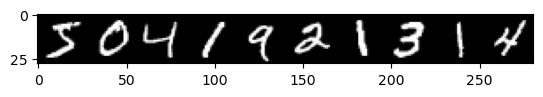

In [83]:
from sklearn.datasets import fetch_openml
# Cargar conjunto de datos MNIST
mnist = fetch_openml('mnist_784',parser='auto')
X = mnist.data  # Normalize pixel values to 0-1 range
images =  np.zeros((28,1))
for i in range(10):
    image =np.array(X.iloc[i]).reshape((28,28))
    images=np.append(images,image,axis=1)
print("\n\n10 primeras imagenes de prueba")    
plt.imshow(images,cmap="gray"); 


In [23]:
[image.min(),image.max()]

[0, 255]

In [24]:
y=np.array(mnist.target.astype(int))
y

array([5, 0, 4, ..., 4, 5, 6])

In [30]:
#aplicar el clasificador 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
X_train.shape

(56000, 784)

In [80]:
import time

print('Train classifier: logistic regression')
clf = LogisticRegression(max_iter=1000, solver='liblinear')
#entrenar

start = time.time()#inicar medida del tiempo
clf.fit(X_train, y_train)
end = time.time() #tomar el tiempo final
#tomar el tiempo para entrenar clasificador
total=end - start
print('Tiempo total entrenamiento: ' + str(total) + ' segundos')

#evaluar
start = time.time()#inicar medida del tiempo
score = clf.score(X_test, y_test)*100
end = time.time() #tomar el tiempo final

print('LogisticRegression score: %f'% score)
#tomar el tiempo para evaluar clasificador
total=end - start
print('Tiempo total evaluando: ' + str(total) + ' segundos')


Train classifier: logistic regression
Tiempo total entrenamiento: 7312.858132839203 segundos
LogisticRegression score: 91.607143
Tiempo total evaluando: 0.4382650852203369 segundos


In [32]:
import time
#aplicar el clasificador empleando normalizacion
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Train classifier: logistic regression with standard scaler')
clf = LogisticRegression(max_iter=1000,  solver='liblinear')
#entrenar

start = time.time()#inicar medida del tiempo
clf.fit(X_train_scaled, y_train)
end = time.time() #tomar el tiempo final
#tomar el tiempo para entrenar clasificador
total=end - start
print('Tiempo total entrenamiento: ' + str(total) + ' segundos')

#evaluar
start = time.time()#inicar medida del tiempo
score = clf.score(X_test_scaled, y_test)*100
end = time.time() #tomar el tiempo final

print('LogisticRegression score: %f'% score)
#tomar el tiempo para evaluar clasificador
total=end - start
print('Tiempo total evaluando: ' + str(total) + ' segundos')


Train classifier: logistic regression with standard scaler
Tiempo total entrenamiento: 1121.6296005249023 segundos
LogisticRegression score: 91.407143
Tiempo total evaluando: 0.26848530769348145 segundos


In [33]:
import time
#aplicar el clasificador empleando normalizacion /255
from sklearn.preprocessing import StandardScaler


X_train_scaled = X_train/255
X_test_scaled = X_test/255

print('Train classifier: logistic regression with standard scaler')
clf = LogisticRegression(max_iter=1000,  solver='liblinear')
#entrenar

start = time.time()#inicar medida del tiempo
clf.fit(X_train_scaled, y_train)
end = time.time() #tomar el tiempo final
#tomar el tiempo para entrenar clasificador
total=end - start
print('Tiempo total entrenamiento: ' + str(total) + ' segundos')

#evaluar
start = time.time()#inicar medida del tiempo
score = clf.score(X_test_scaled, y_test)*100
end = time.time() #tomar el tiempo final

print('LogisticRegression score: %f'% score)
#tomar el tiempo para evaluar clasificador
total=end - start
print('Tiempo total evaluando: ' + str(total) + ' segundos')


Train classifier: logistic regression with standard scaler
Tiempo total entrenamiento: 118.21764540672302 segundos
LogisticRegression score: 91.678571
Tiempo total evaluando: 0.0751805305480957 segundos
